In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

****Loading Dataset****

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

**Dropping irregular  columns**

In [9]:
df = df.drop(["area_type", "society","balcony", "availability"], axis = "columns")

In [10]:
df = df.copy()

In [11]:
# df.drop(['society'], axis=1, inplace=True)

In [12]:
# df.drop(['availability'], axis='columns', inplace=True)

In [13]:
df.shape

(13320, 5)

In [14]:
df = df.dropna()

In [15]:
df.shape

(13246, 5)

In [16]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
# now check relations with price with other columns USING barchart
# plt.figure(figsize=(6, 4))
# df.groupby('area_type')['price'].mean().plot(kind='bar')
# plt.show()




In [18]:
# # 
# plt.figure(figsize=(50, 4))
# sns.lineplot(x='availability', y='price', data=df)
# plt.show() 
# plt.show()

**Standardization of Size column**

In [19]:
df['size'].unique()



array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [20]:
df.shape

(13246, 5)

In [21]:
# df.area_type.value_counts().plot(kind='bar')


In [22]:
df['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

<Axes: xlabel='size'>

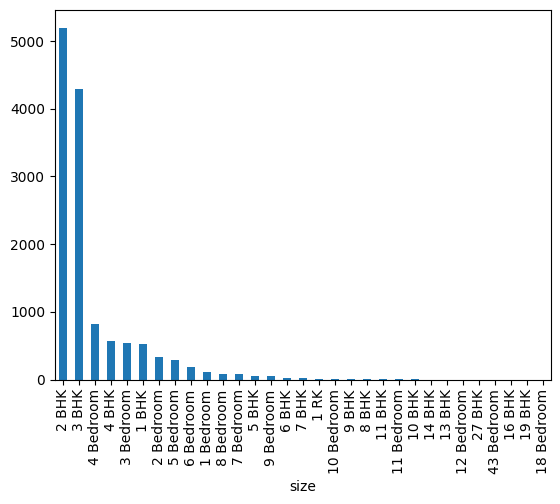

In [23]:
df['size'].value_counts().plot(kind='bar')

In [24]:
df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [25]:
df['size']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13246, dtype: int64

In [26]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [27]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [28]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

**total_sqft ranges to values via avg**

In [29]:
df[~df["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [30]:

def total_sqft_avg(x, Inplace = True):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [31]:
# Ensure changes are applied to the 'total_sqft' column in df
df['total_sqft'] = df['total_sqft'].apply(total_sqft_avg)


In [32]:
df.head(31)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
5,Whitefield,2,1170.0,2.0,38.00
6,Old Airport Road,4,2732.0,4.0,204.00
7,Rajaji Nagar,4,3300.0,4.0,600.00
8,Marathahalli,3,1310.0,3.0,63.25
9,Gandhi Bazar,6,1020.0,6.0,370.00


In [33]:
# df.area_type.value_counts().plot(kind='bar')

In [34]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [35]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [36]:
df['location'].describe()

count          13246
unique          1304
top       Whitefield
freq             534
Name: location, dtype: object

In [37]:
# df['location'] = df['location'].fillna('other')

In [38]:
# # Apply strip only if the value is a string, otherwise return the value as is
# df['location'] = df['location'].apply(lambda x: x.strip())


In [39]:
# # Apply lower() only if the value is a string, otherwise return the value as is
# df['location'] = df['location'].apply(lambda x: x.lower())


In [40]:
#                               ``

In [41]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [42]:
len(location_stats[location_stats<=10])

1052

In [43]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [44]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [45]:
df[df.total_sqft/df.size<300].head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [46]:
df.head(100)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
97,Sarjapura - Attibele Road,3,1330.0,2.0,48.00,3609.022556
98,other,2,1200.0,2.0,65.00,5416.666667
99,other,3,1200.0,3.0,90.00,7500.000000
100,Yeshwanthpur,3,2502.0,3.0,138.00,5515.587530


In [47]:
df.head(100)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
97,Sarjapura - Attibele Road,3,1330.0,2.0,48.00,3609.022556
98,other,2,1200.0,2.0,65.00,5416.666667
99,other,3,1200.0,3.0,90.00,7500.000000
100,Yeshwanthpur,3,2502.0,3.0,138.00,5515.587530


In [48]:
# df['location'] = df['location'].apply(lambda x: x if x in df['location'].value_counts().index[:10] else 'other')

In [49]:
df = df[~(df['total_sqft']/df['size']<300)]
df.shape

(12502, 6)

In [50]:

df['price_per_sqft'].min()

267.82981328435875

In [51]:
df['price_per_sqft'].max()

176470.58823529413

In [52]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


**dealing without outliers**

In [53]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10241, 6)

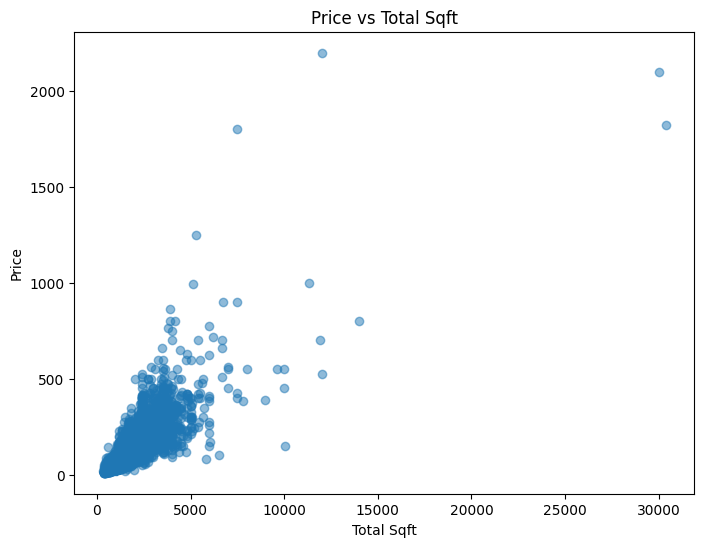

In [54]:
plt.figure(figsize=(8,6))
plt.scatter(df['total_sqft'], df['price'], alpha=0.5)
plt.title('Price vs Total Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show()


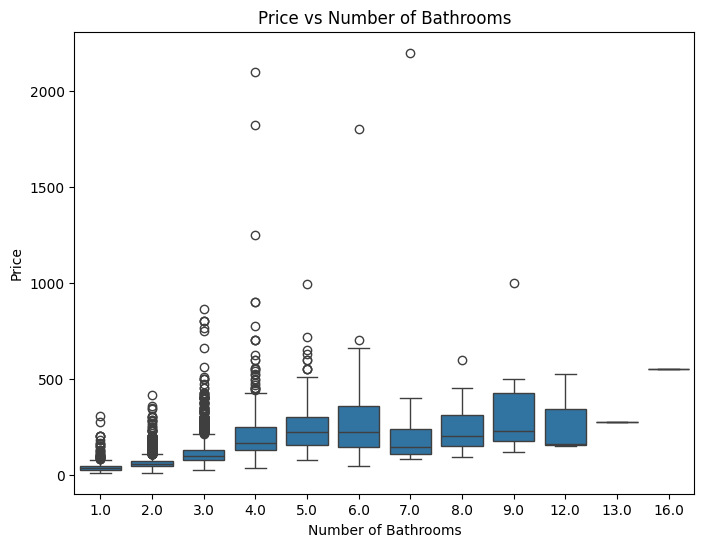

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(x='bath', y='price', data=df)
plt.title('Price vs Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()


In [56]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(6965, 6)

In [57]:
import matplotlib

Encoding for categorical features - Location

In [58]:
df_encoded = pd.get_dummies(df.location)
df_encoded.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df = pd.concat([df,df_encoded.drop('other',axis='columns')],axis='columns')
df.head(10)

,location,size,total_sqft,bath,price,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Phase JP Nagar,4,2825.0,4.0,250.0,8849.557522,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Phase JP Nagar,3,1875.0,3.0,167.0,8906.666667,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1st Phase JP Nagar,3,2024.0,3.0,157.0,7756.916996,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1st Phase JP Nagar,2,1394.0,2.0,100.0,7173.601148,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1st Phase JP Nagar,2,1077.0,2.0,93.0,8635.097493,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1st Phase JP Nagar,3,1590.0,3.0,131.0,8238.993711,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1st Phase JP Nagar,3,2180.0,3.0,210.0,9633.027523,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df.head(100)

,location,size,total_sqft,bath,price,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Phase JP Nagar,4,2825.0,4.0,250.0,8849.557522,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Phase JP Nagar,3,1875.0,3.0,167.0,8906.666667,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7th Phase JP Nagar,2,1050.0,2.0,77.0,7333.333333,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,7th Phase JP Nagar,2,1050.0,2.0,75.0,7142.857143,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,7th Phase JP Nagar,2,1040.0,2.0,75.0,7211.538462,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,7th Phase JP Nagar,3,1400.0,2.0,95.0,6785.714286,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
df.drop('location',axis='columns',inplace=True)

**Making training Features Ready**

In [62]:
X =df.drop('price', axis=1)

**Correlation among features**

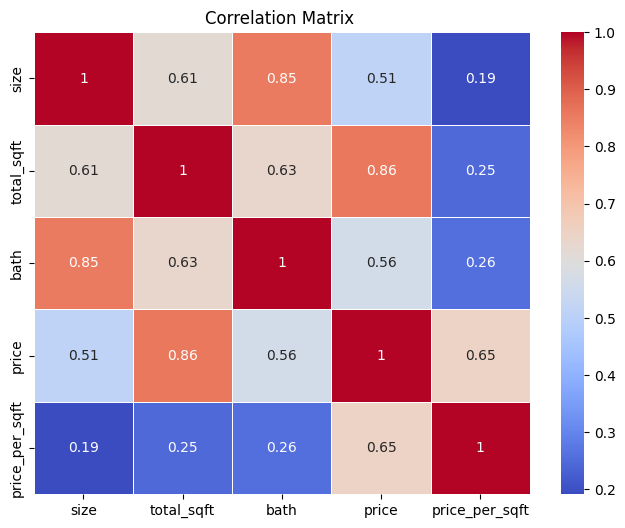

In [63]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix ')
plt.show()

In [64]:
X.drop('price_per_sqft', axis='columns', inplace=True)

In [65]:
df.isnull().sum()

size                  0
total_sqft            0
bath                  0
price                 0
price_per_sqft        0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 246, dtype: int64

In [66]:
X

,size,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,1630.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1875.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1235.0,2.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,2825.0,4.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1875.0,3.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2,1095.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6961,2,1256.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6962,2,1353.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6963,3,1440.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
import pickle
import pandas as pd

# Assuming df is your DataFrame with all features and 'price' is the target variable
# Drop the target 'price' column to create the feature matrix 
# Save the feature matrix (X) as a pickle file
with open('feature_matrix.pkl', 'wb') as f:
    pickle.dump(X, f)
 
print("Feature matrix saved as feature_matrix.pkl")


Feature matrix saved as feature_matrix.pkl


In [68]:
X.shape

(6965, 244)

In [69]:
y = df['price']

Model Training and Evaluation

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
LR = LinearRegression()

LR.fit(X_train, y_train)


LinearRegression()

In [72]:
LR.score(X_test, y_test)

0.9157366855166399

In [73]:
# shuffling the test_train split

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=52)

cross_val_score(LinearRegression(), X, y, cv=shuffle)

array([ 8.84081109e-01, -9.73963599e+12,  9.27443034e-01,  9.11614390e-01,
        9.35944233e-01])

In [74]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1

    return LR.predict([x])[0]

In [75]:
predict_price('Vasanthapura', 1400, 3,3)

c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.63012308440214

In [76]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


97.03829864049584

In [77]:
def predict_price(location, sqft, bath, size):
    x = np.zeros(len(X.columns))
    x[0] = size  
    x[1] = sqft  
    x[2] = bath 
    if location in X.columns:
        loc_index = X.columns.get_loc(location)
        x[loc_index] = 1
    else:
        return "Error: Location not found in the model's feature set."
    try:
        return LR.predict([x])[0]
    except Exception as e:
        return f"Prediction error: {str(e)}"


In [78]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(LR, file)


In [79]:
# y_pred = LR.predict(X_test)  # Replace LR with your trained model
# y_actual = y_test  # Replace with your actual target values

# # Plotting the curve
# plt.figure(figsize=(10, 6))
# plt.plot(y_actual, label='Actual Values', color='b')
# plt.plot(y_pred, label='Predicted Values', color='r')
# plt.xlabel('Samples')
# plt.ylabel('Values')
# plt.title('Actual vs Predicted Values')
# plt.legend()
# plt.show()

: 

In [80]:
# # Import necessary libraries
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of boosting stages
#     'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
#     'max_depth': [3, 4, 5],  # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
# }

# # Initialize Gradient Boosting Regressor
# gbr = GradientBoostingRegressor(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=1)

# # Train the model with grid search
# grid_search.fit(X_train, y_train)

# # Best parameters from grid search
# best_params = grid_search.best_params_
# print(f"Best parameters: {best_params}")

# # Best estimator (model) from the grid search
# best_gbr = grid_search.best_estimator_

# # Predicting with the best model
# y_pred_gbr = best_gbr.predict(X_test)

# # Evaluate the best model
# mse = mean_squared_error(y_test, y_pred_gbr)
# accuracy = best_gbr.score(X_test, y_test) * 100
# print(f"Mean Squared Error: {mse}")
# print(f"Optimized Gradient Boosting Regressor Accuracy: {accuracy:.2f}%")

# # Plotting Actual vs Predicted values
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(y_test.values, label='Actual Values', color='b')
# plt.plot(y_pred_gbr, label='Predicted Values', color='r')
# plt.xlabel('Samples')
# plt.ylabel('Values')
# plt.title('Actual vs Predicted Values - Optimized Gradient Boosting Regressor')
# plt.legend()
# plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Mean Squared Error (XGBoost): 1715.1246270920299
XGBoost Regressor Accuracy: 81.01%


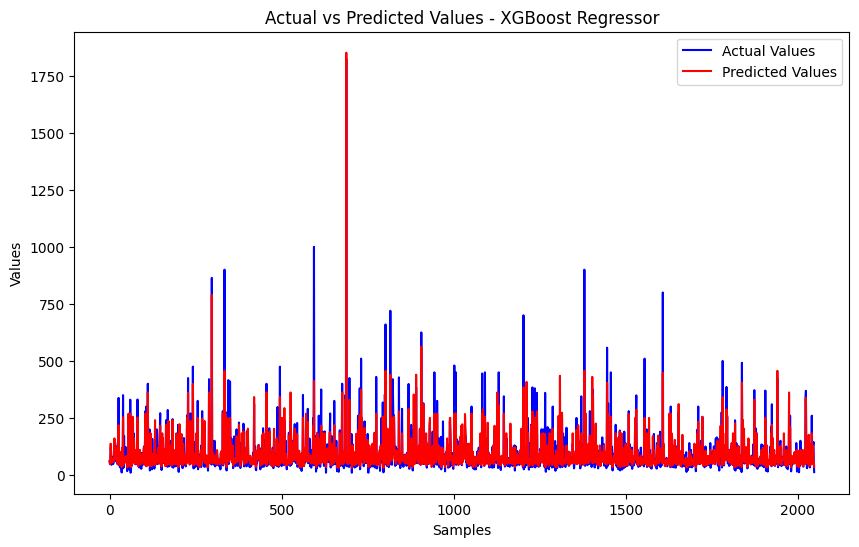

In [487]:
# # Importing necessary libraries
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error

# # Initialize the XGBoost Regressor
# xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# # Train the model
# xgboost_model.fit(X_train, y_train)

# # Predicting on test set
# y_pred_xgb = xgboost_model.predict(X_test)

# # Evaluate the model
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# accuracy_xgb = xgboost_model.score(X_test, y_test) * 100
# print(f"Mean Squared Error (XGBoost): {mse_xgb}")
# print(f"XGBoost Regressor Accuracy: {accuracy_xgb:.2f}%")

# # Plotting Actual vs Predicted values
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(y_test.values, label='Actual Values', color='b')
# plt.plot(y_pred_xgb, label='Predicted Values', color='r')
# plt.xlabel('Samples')
# plt.ylabel('Values')
# plt.title('Actual vs Predicted Values - XGBoost Regressor')
# plt.legend()
# plt.show()


Mean Squared Error (Ridge): 1708.3313756210723
Ridge Regression Accuracy: 81.09%


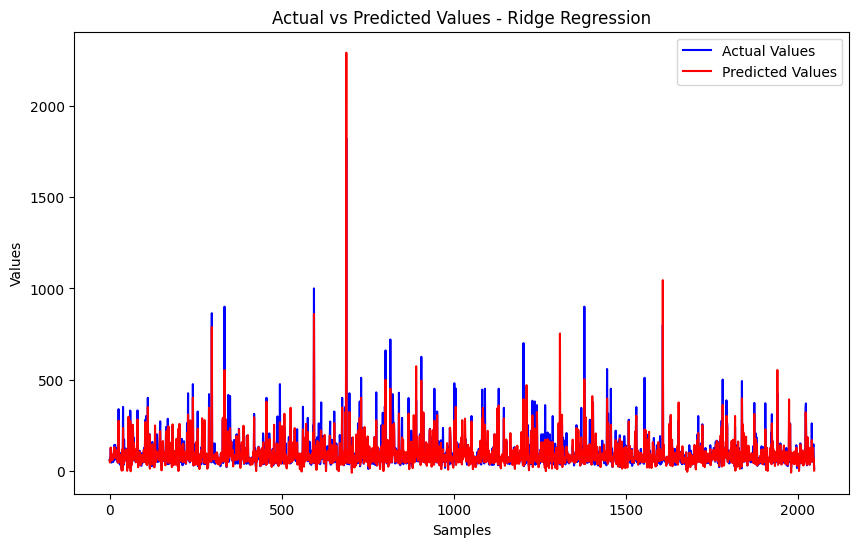

In [489]:
# # Import necessary libraries
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error

# # Initialize Ridge regression model
# ridge_model = Ridge(alpha=1.0)

# # Train the model
# ridge_model.fit(X_train, y_train)

# # Predicting on test set
# y_pred_ridge = ridge_model.predict(X_test)

# # Evaluate the model
# mse_ridge = mean_squared_error(y_test, y_pred_ridge)
# accuracy_ridge = ridge_model.score(X_test, y_test) * 100
# print(f"Mean Squared Error (Ridge): {mse_ridge}")
# print(f"Ridge Regression Accuracy: {accuracy_ridge:.2f}%")

# # Plotting Actual vs Predicted values
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(y_test.values, label='Actual Values', color='b')
# plt.plot(y_pred_ridge, label='Predicted Values', color='r')
# plt.xlabel('Samples')
# plt.ylabel('Values')
# plt.title('Actual vs Predicted Values - Ridge Regression')
# plt.legend()
# plt.show()


In [493]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge (you can modify for Lasso as well)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 200]}

# Initialize GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')

# Train the model with grid search
grid_search_ridge.fit(X_train, y_train)

# Best parameters from grid search
best_ridge = grid_search_ridge.best_estimator_
print(f"Best alpha for Ridge: {grid_search_ridge.best_params_}")

# Predicting with the best Ridge model
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate the best model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
accuracy_ridge = best_ridge.score(X_test, y_test) * 100
print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"Optimized Ridge Regression Accuracy: {accuracy_ridge:.2f}%")


Best alpha for Ridge: {'alpha': 0.1}
Mean Squared Error (Ridge): 1698.1699775911434
Optimized Ridge Regression Accuracy: 81.20%


Mean Squared Error (Random Forest): 1699.1099166408474
Random Forest Accuracy: 0.81%


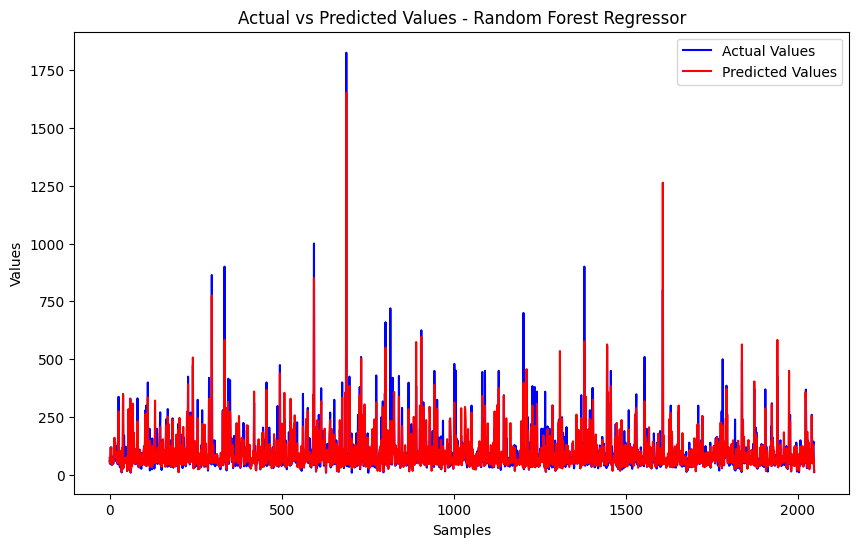

In [496]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
accuracy_rf = rf_model.score(X_test, y_test) 
print(f"Mean Squared Error (Random Forest): {mse_rf}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}%")

# Plotting Actual vs Predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='b')
plt.plot(y_pred_rf, label='Predicted Values', color='r')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values - Random Forest Regressor')
plt.legend()
plt.show()



In [498]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=50,              # Number of parameter settings sampled
    cv=3,                   # Number of cross-validation folds
    n_jobs=-1,             # Use all available cores
    verbose=1,             # Verbosity level
    scoring='r2',          # Scoring method
    random_state=42        # Random seed for reproducibility
)

# Fit the model with RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Best parameters found
best_params_rf_random = random_search_rf.best_params_
print(f"Best parameters for Random Forest (Randomized Search): {best_params_rf_random}")

# Best estimator from the random search
best_rf_random = random_search_rf.best_estimator_

# Predicting with the best Random Forest model
y_pred_rf_random = best_rf_random.predict(X_test)

# Evaluate the best model
mse_rf_random = mean_squared_error(y_test, y_pred_rf_random)
accuracy_rf_random = best_rf_random.score(X_test, y_test) * 100
print(f"Mean Squared Error (Optimized Random Forest - Randomized): {mse_rf_random}")
print(f"Optimized Random Forest Accuracy (Randomized): {accuracy_rf_random:.2f}%")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for Random Forest (Randomized Search): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Mean Squared Error (Optimized Random Forest - Randomized): 1633.201649678366
Optimized Random Forest Accuracy (Randomized): 81.92%


In [499]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Initialize XGBoost Regressor
xgb_model = XGBRegressor()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators':  300,
    'max_depth': 7,
    'learning_rate':  0.1,
    'subsample': 1.0,
    'colsample_bytree':  1.0
}

# Use GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best parameters found
best_params_xgb = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost: {best_params_xgb}")

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
accuracy_xgb = best_xgb.score(X_test, y_test) * 100
print(f"Mean Squared Error (Optimized XGBoost): {mse_xgb}")
print(f"Optimized XGBoost Accuracy: {accuracy_xgb:.2f}%")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Mean Squared Error (Optimized XGBoost): 1550.3239260966577
Optimized XGBoost Accuracy: 82.84%


In [ ]:


# Save the fine-tuned XGBoost model
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

print("XGBoost model saved successfully.")


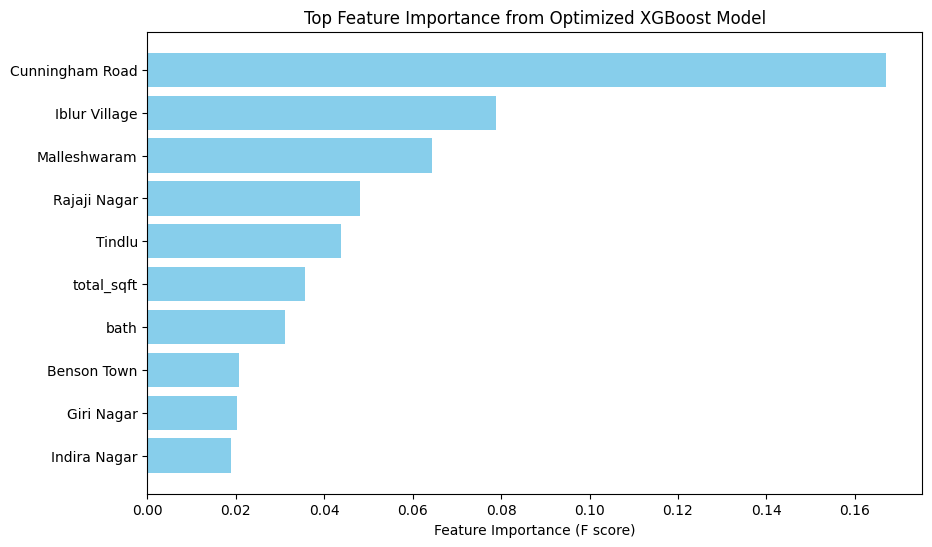

In [501]:
import numpy as np

# Get feature importances
importances = best_xgb.feature_importances_

# Create a list of feature names
feature_names = X_train.columns  

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Select top N features to visualize
top_n = 10  # Adjust this value as needed
top_features = feature_names[indices][:top_n]
top_importances = importances[indices][:top_n]
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance (F score)')
plt.title('Top Feature Importance from Optimized XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis for better visibility
plt.show()
